In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.pylab as pylab
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FuncFormatter
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

## Preparation

In [2]:
df = pd.read_csv('Dauerzählstelle_Herosépark_2019_Wetter.csv', sep=';', encoding='ISO-8859-1')
# English names: ['Date', 'Time', 'Total', 'In','Out', 'Weather','Temp','Felt_Temp', 'Rain']
df = df.rename(columns={'Fahrradbruecke': 'Total', 
                        'Fahrradbruecke stadteinwaerts': 'In',
                        'Fahrradbruecke stadtauswaerts': 'Out'})

# Vergleich mit 2018
df2 = pd.read_csv('Zählstelle_Herosé_Rohdaten_2018_Wetter_stündlich.csv', sep=';', encoding='UTF-8')
df2 = df2.rename(columns={'Fahrradbruecke': 'Total', 
                        'Fahrradbruecke stadteinwaerts': 'In',
                        'Fahrradbruecke stadtauswärts': 'Out'})

In [3]:
# global graph features
params = {'legend.fontsize': 'medium',
          'figure.figsize': (7, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium',
          'font.family': 'sans-serif',
         'font.sans-serif': 'Verdana'}
pylab.rcParams.update(params)

In [4]:
# 2019
df['Zeit'] = pd.to_datetime(df.Datum +', ' + df.Uhrzeit)
df['Datum'] = pd.to_datetime(df.Datum , dayfirst=True)
df['Monat'] = df['Zeit'].dt.month

# 2018
df2['Zeit2'] = pd.to_datetime(df2['Zeit'], dayfirst=True)
df2['Datum'] = df2['Zeit2'].dt.date
df2['Monat'] = df2['Zeit2'].dt.month

# Wochentag 2019
df['Wochentag'] = df['Zeit'].dt.day_name()
df['Wochentag'] = pd.Categorical(df['Wochentag'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)
df['Wochentag'] = df['Wochentag'].cat.rename_categories(['Mon', 'Die', 'Mit', 'Don', 'Fre', 'Sam', 'Son'])

## Rekorde und Vergleich 2018

In [5]:
# Rekorde

# Total 2019
print('Total Count: ' + str(int(df['Total'].sum())))

# max pro Stunde
max = int(df['Total'].max())
max_date = df[df['Total'] == max]['Datum'].iloc[0].strftime('%d, %b %Y')
max_time = df[df['Total'] == max]['Uhrzeit'].iloc[0]
# print(max_date.strftime('We are the %d, %b %Y'))
print('Max Count Stunde: ' + str(max) + ' am ' + max_date + ' um ' + max_time)

# max pro Tag
sums = df.groupby('Datum')[['Total']].sum()
sums['Datum'] = sums.index
max = sums.Total.max()
max_date = sums[sums['Total'] == max]['Datum'].iloc[0].strftime('%d, %b %Y')
print('Max Count Tag: ' + str(int(max)) + ' am ' + max_date)



Total Count: 3456630
Max Count Stunde: 1815 am 16, Jul 2019 um 17:00
Max Count Tag: 21219 am 16, Jul 2019


In [6]:
# Vergleich 2018 - 2019

# Range aller verfügbaren Daten 2018
drange = pd.date_range(start='8/8/2019', end='31/12/2019')
tot_2019 = int(df[df['Datum'].isin(drange)]['Total'].sum())
tot_2018 = int(df2['Total'].sum())
print('Vergleich 08.08-31.12 \n2019: %i \n2018: %i' %(tot_2019,tot_2018))

# Anstieg
plus = int(((tot_2019/tot_2018) - 1)*100)
print('Anstieg: +'+str(plus)+'%' )

Vergleich 08.08-31.12 
2019: 1559538 
2018: 1139315
Anstieg: +36%


## Zeit

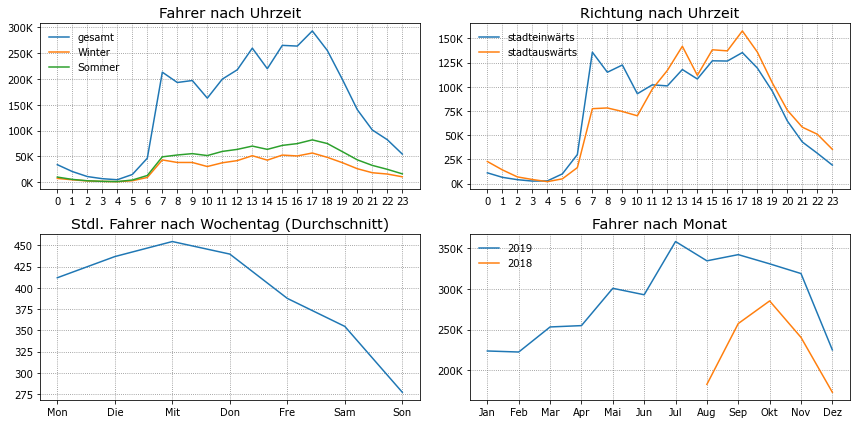

In [7]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Verdana'
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

# Uhrzeit
axes[0,0].plot(df.groupby(by=['Uhrzeit'])['Total'].sum(), label='gesamt')
axes[0,0].plot(df[df['Monat'].isin([12,1,2])].groupby(by=['Uhrzeit'])['Total'].sum(), label='Winter')
axes[0,0].plot(df[df['Monat'].isin([6,7,8])].groupby(by=['Uhrzeit'])['Total'].sum(), label='Sommer')
axes[0,0].set_title('Fahrer nach Uhrzeit')
axes[0,0].set_xticklabels(labels=range(24))
axes[0,0].grid(b=True, which='major', color='grey', linestyle='dotted')
axes[0,0].legend(frameon=False)
axes[0,0].get_yaxis().set_major_formatter(FuncFormatter(lambda x,p: str(int(x/1000))+ 'K'))

# Uhrzeit In/Out
axes[0,1].plot(df.groupby(by=['Uhrzeit'])['In'].sum(), label='stadteinwärts')
axes[0,1].plot(df.groupby(by=['Uhrzeit'])['Out'].sum(), label='stadtauswärts')
axes[0,1].set_title('Richtung nach Uhrzeit')
axes[0,1].set_xticklabels(labels=range(24))
axes[0,1].grid(b=True, which='major', color='grey', linestyle='dotted')
axes[0,1].legend(frameon=False)
axes[0,1].get_yaxis().set_major_formatter(FuncFormatter(lambda x,p: str(int(x/1000))+ 'K'))

# Wochentag
axes[1,0].plot(df.groupby(by=['Wochentag'])['Total'].mean())
axes[1,0].set_title('Stdl. Fahrer nach Wochentag (Durchschnitt)')
axes[1,0].grid(b=True, which='major', color='grey', linestyle='dotted')
# axes[1,0].get_yaxis().set_major_formatter(FuncFormatter(lambda x,p: str(int(x/1000))+ 'K'))

# Monat
axes[1,1].plot(df.groupby(by=['Monat'])['Total'].sum(), label='2019')
axes[1,1].plot(df2.groupby(by=['Monat'])['Total'].sum(), label='2018')
axes[1,1].set_title('Fahrer nach Monat')
axes[1,1].xaxis.set_major_locator(plt.MultipleLocator(1))
months = ['Empty', 'Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']
axes[1,1].set_xticklabels(labels=months)
axes[1,1].grid(b=True, which='major', color='grey', linestyle='dotted')
axes[1,1].legend(frameon=False)
axes[1,1].get_yaxis().set_major_formatter(FuncFormatter(lambda x,p: str(int(x/1000))+ 'K'))

fig.tight_layout()
plt.savefig("test.svg")

## Wetter



In [8]:
# weniger Kategorien sind besser
df['Symbol Wetter'].unique()
kein_nieders = ['Sonnig', 'Leicht bewölkt', 'Bedeckt', 'Nebel',
                'Leichter Nebel', 'Bewölkt']
leicht_nieders = ['Stellenweiser leichter Regenfall', 'Nieselregen', 'Stellenweiser Regenfall',
                  'Stellenweise leichter Schneefall', 'Leichter Eisregen', 'Stellenweiser Nieselregen',
                  'Leichte Schneeschauer','Leichter Schneefall','Leichter Regenfall', 'Leichte Eisregen',]
maessig_nieders = ['Teilweise mäßiger Regenfall','Mäßiger Schneefall', 'Stellenweiser Eisregen',
                   'Stellenweise mäßiger Schneefall','Mäßiger Regenfall']
stark_nieders = ['Mäßiger bis starker Regen mit Gewitter', 
                 'Mäßiger bis starker Regenschauer', 'Stellenweise Gewitter und Niederschläge',
                 'Nieselregen mit Gewitter', 'Sintflutartiger Regenfall',
                 'Teilweise starker Regenfall','Leichter Regenschauer', 'Schneesturm',    
                 'Starker Schneefall', 'Mäßiger bis starker Eisregen', 'Starker Regenfall', 
                 'Stellenweiser Schneefall', 'Stellenweise starker Schneefall',
                 'Mäßige bis starke Schneefälle', ]

In [9]:
# neue Variable mit vier Kategorien
df['Niederschlag'] = None
def func(x):
    if x in kein_nieders:
        return 'kein'
    if x in leicht_nieders:
        return 'leicht'
    if x in maessig_nieders:
        return 'meassig'
    if x in stark_nieders:
        return 'stark'

df['Niederschlag'] = df['Symbol Wetter'].apply(func)

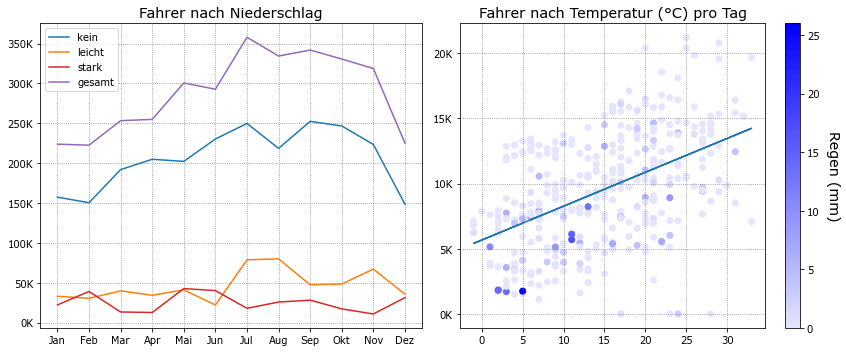

In [10]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Verdana'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# plot Fahrer nach Niederschlagskategorie
sns.lineplot(data=df[df.Niederschlag == "kein"].groupby('Monat')['Total'].sum(), label='kein', ax=axes[0]);
sns.lineplot(data=df[df.Niederschlag == "leicht"].groupby('Monat')['Total'].sum(), label='leicht', ax=axes[0]);
sns.lineplot(data=df[df.Niederschlag == "maessig"].groupby('Monat')['Total'].sum(), label='maessig', ax=axes[0]);
sns.lineplot(data=df[df.Niederschlag == "stark"].groupby('Monat')['Total'].sum(), label='stark', ax=axes[0]);
sns.lineplot(data=df.groupby('Monat')['Total'].sum(), label='gesamt', ax=axes[0]);

axes[0].set_title('Fahrer nach Niederschlag')
axes[0].xaxis.set_major_locator(plt.MultipleLocator(1))
axes[0].set_xticklabels(labels=months)
axes[0].grid(b=True, which='major', color='grey', linestyle='dotted')
axes[0].get_yaxis().set_major_formatter(FuncFormatter(lambda x,p: str(int(x/1000))+ 'K'))

# GroupBy Tag
wetter = df.groupby(by=['Datum'])[['Temperatur (°C)', 'Regen (mm)', 'Total']].agg({'Temperatur (°C)':'max',
                                                                                 'Regen (mm)': 'sum', 
                                                                                 'Total': 'sum'})
# Scatterplot für Fahrer nach Temperatur
cmap = sns.light_palette("blue", as_cmap=True)
points = axes[1].scatter(wetter['Temperatur (°C)'], wetter['Total'], c=wetter['Regen (mm)'], cmap=cmap)
fig.colorbar(points).set_label('Regen (mm)', rotation=270, labelpad=20)
axes[1].set_title('Fahrer nach Temperatur (°C) pro Tag')
# plot Trendline
m, b = np.polyfit(wetter['Temperatur (°C)'], wetter['Total'], 1)
axes[1].plot(wetter['Temperatur (°C)'], m*wetter['Temperatur (°C)'] + b)
axes[1].grid(b=True, which='major', color='grey', linestyle='dotted')
axes[1].get_yaxis().set_major_formatter(FuncFormatter(lambda x,p: str(int(x/1000))+ 'K'))

fig.tight_layout()
plt.savefig("test2.svg")

## Regression

In [11]:
# linear regression
df['Temp'] = df['Temperatur (°C)']
df['Regen'] = df['Regen (mm)']

res = smf.ols(formula='Total ~ Temp + Regen + C(Wochentag, Treatment) + C(Uhrzeit, Treatment)', data=df, missing='drop').fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     492.8
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:25:59   Log-Likelihood:                -59602.
No. Observations:                8758   AIC:                         1.193e+05
Df Residuals:                    8726   BIC:                         1.195e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         16.4081     13.131      1.250      0.211      -9.332      42.148
C(Wochentag, Treatment)[T.Die]    34.2621      8.724      3.928      0.000      17.162      51.362
C(Wochentag, Treatment)[T.Mit]    43.3913      8.763      4.952      0.000      26.214      60.569
C(Wochentag, Treatment)[T.Don]    29.7548      8.767      3.394      0.001      12.570      46.939
C(Wochentag, Treatment)[T.Fre]   -24.1994      8.762     -2.762      0.006     -41.375      -7.023
C(Wochentag, Treatment)[T.Sam]   -61.7338      8.765     -7.044      0.000     -78.915     -44.553
C(Wochentag, Treatment)[T.Son]  -138.7217      8.769    -15.819      0.000    -155.912    -121.532
C(Uhrzeit, Treatment)[T.01:00]   -38.6971     16.211     -2.387      0.017     -70.474      -6.920
C(Uhrzeit, Treatment)[T.02:00]   -64.6800     16.235     -3.984      0.000     -96.505     -32.855
C(Uhrzeit, Treatment)[T.03:00]   -69.2965     16.210     -4.275      0.000    -101.071     -37.522
C(Uhrzeit, Treatment)[T.04:00]   -79.5076     16.234     -4.898      0.000    -111.330     -47.685
C(Uhrzeit, Treatment)[T.05:00]   -51.9697     16.211     -3.206      0.001     -83.748     -20.192
C(Uhrzeit, Treatment)[T.06:00]    33.7465     16.205      2.082      0.037       1.981      65.512
C(Uhrzeit, Treatment)[T.07:00]   473.6015     16.225     29.189      0.000     441.796     505.407
C(Uhrzeit, Treatment)[T.08:00]   406.4060     16.229     25.042      0.000     374.593     438.219
C(Uhrzeit, Treatment)[T.09:00]   406.2093     16.233     25.024      0.000     374.389     438.029
C(Uhrzeit, Treatment)[T.10:00]   297.5197     16.265     18.291      0.000     265.635     329.404
C(Uhrzeit, Treatment)[T.11:00]   387.8171     16.281     23.820      0.000     355.903     419.731
C(Uhrzeit, Treatment)[T.12:00]   426.3669     16.308     26.145      0.000     394.400     458.334
C(Uhrzeit, Treatment)[T.13:00]   534.9877     16.329     32.764      0.000     502.980     566.995
C(Uhrzeit, Treatment)[T.14:00]   424.3825     16.331     25.986      0.000     392.370     456.395
C(Uhrzeit, Treatment)[T.15:00]   546.1332     16.336     33.431      0.000     514.110     578.156
C(Uhrzeit, Treatment)[T.16:00]   548.8946     16.321     33.631      0.000     516.902     580.887
C(Uhrzeit, Treatment)[T.17:00]   641.0873     16.285     39.368      0.000     609.166     673.009
C(Uhrzeit, Treatment)[T.18:00]   547.6326     16.261     33.678      0.000     515.758     579.507
C(Uhrzeit, Treatment)[T.19:00]   401.8420     16.256     24.720      0.000     369.976     433.708
C(Uhrzeit, Treatment)[T.20:00]   252.9011     16.233     15.579      0.000     221.080     284.722
C(Uhrzeit, Treatment)[T.21:00]   158.5784     16.214      9.780      0.000     126.796     190.361
C(Uhrzeit, Tre